# ANALYZING HOW SKILLS TREND OVER TIME(MONTH) FOR VARIOUS TOP JOB POSTINGS

In [147]:
# STEP 1 : LOAD DATA AND MAKE NECESSARY CHANGES TO CLEAN IT
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
data_set = load_dataset('lukebarousse/data_jobs')
df= data_set['train'].to_pandas()

# Cleaning Up Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)


In [148]:
# SORTING FOR JOBS POSTED IN INDIA
df_India= df[df['job_country']=='India'].copy()

In [149]:
 # CREATING A NEW COLUMN FOR JOB POSTED BY MONTH
df_India['job_posted_month'] = df_India['job_posted_date'].dt.month

In [150]:
# EXPLODING THE SKILLS COLUMN TO GET COUNT AND AGGREGATION
df_India_exp = df_India.explode('job_skills')

In [151]:
 # USING PIVOT TABLE TO FORMAT THE TABLE
df_ind_pivot = df_India_exp.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)

In [152]:
df_ind_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,444,4,124,51,0,48,0,2,1,22,...,2,73,2,128,0,0,0,0,47,14
2,358,0,76,32,0,44,0,6,1,4,...,1,47,1,77,1,0,0,4,25,8
3,381,0,77,25,3,39,0,0,2,7,...,1,52,1,86,1,0,0,0,35,8
4,380,0,88,27,0,32,0,5,1,6,...,1,55,4,101,2,0,0,2,26,9
5,351,0,70,24,0,26,0,1,1,5,...,0,30,1,67,0,0,1,0,20,10
6,402,0,82,24,2,28,3,2,4,10,...,1,63,4,70,2,0,2,0,25,13
7,402,0,91,27,1,31,4,1,2,3,...,0,46,2,96,0,0,0,0,29,12
8,397,0,120,26,2,36,4,0,0,7,...,1,37,2,111,0,0,0,1,24,8
9,323,1,69,16,1,30,0,1,4,1,...,0,29,5,79,0,1,0,1,23,5


In [153]:
# CREATING A NEW ROW OF TOTAL
df_ind_pivot.loc['Total'] = df_ind_pivot.sum()

In [154]:
df_ind_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,444,4,124,51,0,48,0,2,1,22,...,2,73,2,128,0,0,0,0,47,14
2,358,0,76,32,0,44,0,6,1,4,...,1,47,1,77,1,0,0,4,25,8
3,381,0,77,25,3,39,0,0,2,7,...,1,52,1,86,1,0,0,0,35,8
4,380,0,88,27,0,32,0,5,1,6,...,1,55,4,101,2,0,0,2,26,9
5,351,0,70,24,0,26,0,1,1,5,...,0,30,1,67,0,0,1,0,20,10
6,402,0,82,24,2,28,3,2,4,10,...,1,63,4,70,2,0,2,0,25,13
7,402,0,91,27,1,31,4,1,2,3,...,0,46,2,96,0,0,0,0,29,12
8,397,0,120,26,2,36,4,0,0,7,...,1,37,2,111,0,0,0,1,24,8
9,323,1,69,16,1,30,0,1,4,1,...,0,29,5,79,0,1,0,1,23,5


In [155]:
# SORTING THE TOTAL ROW
df_ind_pivot = df_ind_pivot[df_ind_pivot.loc['Total'].sort_values(ascending=False).index]

In [156]:
# REMOVING THE CREATED ROW
df_ind_pivot = df_ind_pivot.drop('Total')

In [157]:
# CREATING A % OF OCCURANCE OF THESE SKILLS IN JOB POSTINGS IN RESPECTIVE MONTHS
df_skill_by_month = df_India.groupby('job_posted_month').size()

In [158]:
# CALCULATING THE % 
df_final = df_ind_pivot.div(df_skill_by_month/100,axis=0)

In [159]:
df_final

job_skills,python,sql,aws,spark,azure,tableau,r,hadoop,java,scala,...,symfony,fastify,fedora,erlang,esquisse,nuxt.js,svelte,suse,sqlserver,shogun
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,57.868020,58.575054,25.507614,25.906454,24.510515,15.736041,15.337201,16.461204,15.536621,12.382161,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,56.958175,57.642586,25.956907,27.249683,23.295311,15.994930,14.195184,18.149556,16.349810,12.091255,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025349,0.00000
3,59.562842,59.711873,26.900149,27.223050,23.919523,16.318927,14.977645,15.548932,16.045703,12.344759,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.024839,0.000000,0.00000
4,56.658354,59.002494,26.783042,27.256858,23.391521,16.209476,14.339152,16.109726,16.234414,11.945137,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,60.330579,59.718396,29.507193,28.191001,25.191307,16.008571,13.712886,15.977961,15.610652,13.406795,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,61.972838,59.923755,28.591851,28.996903,25.232309,15.987610,16.249702,15.844651,16.154396,13.533476,...,0.000000,0.000000,0.00000,0.023827,0.023827,0.000000,0.000000,0.000000,0.000000,0.00000
7,58.879185,59.655507,26.952935,25.327511,25.715672,15.550704,15.526443,15.526443,13.949539,12.760796,...,0.000000,0.000000,0.02426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02426
8,56.111758,56.717113,26.426077,25.401630,22.724098,16.996508,16.786962,14.528522,14.272410,10.849825,...,0.023283,0.000000,0.00000,0.000000,0.000000,0.023283,0.000000,0.000000,0.000000,0.00000
9,56.490034,56.441420,25.109383,22.168206,23.723870,15.896937,14.462810,13.733593,13.441906,12.396694,...,0.024307,0.048614,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [160]:
df_final = df_final.reset_index()

# convert numeric month → datetime → month short name (Jan, Feb, etc.)
df_final['job_posted_month_wise'] = df_final['job_posted_month'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').strftime('%b')
)

# set new column as index
df_final = df_final.set_index('job_posted_month_wise')

# drop old numeric month column
df_final = df_final.drop(columns='job_posted_month')


In [161]:
df_final

job_skills,python,sql,aws,spark,azure,tableau,r,hadoop,java,scala,...,symfony,fastify,fedora,erlang,esquisse,nuxt.js,svelte,suse,sqlserver,shogun
job_posted_month_wise,,,,,,,,,,,,,,,,,,,,,
Jan,57.868020,58.575054,25.507614,25.906454,24.510515,15.736041,15.337201,16.461204,15.536621,12.382161,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Feb,56.958175,57.642586,25.956907,27.249683,23.295311,15.994930,14.195184,18.149556,16.349810,12.091255,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025349,0.00000
Mar,59.562842,59.711873,26.900149,27.223050,23.919523,16.318927,14.977645,15.548932,16.045703,12.344759,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.024839,0.000000,0.00000
Apr,56.658354,59.002494,26.783042,27.256858,23.391521,16.209476,14.339152,16.109726,16.234414,11.945137,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
May,60.330579,59.718396,29.507193,28.191001,25.191307,16.008571,13.712886,15.977961,15.610652,13.406795,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Jun,61.972838,59.923755,28.591851,28.996903,25.232309,15.987610,16.249702,15.844651,16.154396,13.533476,...,0.000000,0.000000,0.00000,0.023827,0.023827,0.000000,0.000000,0.000000,0.000000,0.00000
Jul,58.879185,59.655507,26.952935,25.327511,25.715672,15.550704,15.526443,15.526443,13.949539,12.760796,...,0.000000,0.000000,0.02426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02426
Aug,56.111758,56.717113,26.426077,25.401630,22.724098,16.996508,16.786962,14.528522,14.272410,10.849825,...,0.023283,0.000000,0.00000,0.000000,0.000000,0.023283,0.000000,0.000000,0.000000,0.00000
Sep,56.490034,56.441420,25.109383,22.168206,23.723870,15.896937,14.462810,13.733593,13.441906,12.396694,...,0.024307,0.048614,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


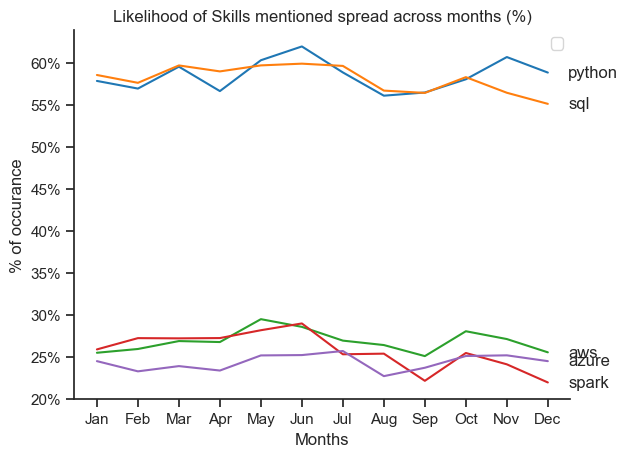

In [182]:
# FILTERING ONLY THE TOP 5 SKILLS

df_plot = df_final.iloc[:,:5]

#PLOTTING USING SEABORN

sns.lineplot(df_plot,dashes=False, palette='tab10')

#CUSTOMIZING THE PLOT

sns.set_theme(style='ticks')
sns.despine()
plt.title('Likelihood of Skills mentioned spread across months (%)')
plt.legend('')
plt.xlabel('Months')
plt.ylabel('% of occurance')

# TO CHANGE THE Y AXIS INTO % FORMAT

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

# FOR DIRECT LABELLING INSTEAD OF LEGENDS

for i in range(5): 
    plt.text(11.5,df_plot.iloc[-1,i],df_plot.columns[i],va='center')

plt.show()
